# Evaluation Metrics

Evaluation metrics help us measure how well a machine learning model performs. 
The choice of metric depends on the type of problem (classification, regression, ranking, etc.).


## Confusion Matrix
A confusion matrix is a table used to describe the performance of a classification model.

- True Positive (TP): Correctly predicted positive cases
- True Negative (TN): Correctly predicted negative cases
- False Positive (FP): Incorrectly predicted positive (Type I Error)
- False Negative (FN): Incorrectly predicted negative (Type II Error)



### Accuracy
Proportion of correctly classified samples.
$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

### Precision
Out of predicted positives, how many are actually positive?
$$ Precision = \frac{TP}{TP + FP} $$

### Recall (Sensitivity/TPR)
Out of actual positives, how many are correctly predicted?
$$ Recall = \frac{TP}{TP + FN} $$

### F1 Score
Harmonic mean of precision and recall.
$$ F1 = \frac{2 \cdot (Precision \cdot Recall)}{Precision + Recall} $$


In [9]:
from sklearn.metrics import classification_report

y_true = ["apple", "banana", "apple", "orange", "banana", "apple"]
y_pred = ["apple", "banana", "orange", "orange", "banana", "banana"]

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

       apple       1.00      0.33      0.50         3
      banana       0.67      1.00      0.80         2
      orange       0.50      1.00      0.67         1

    accuracy                           0.67         6
   macro avg       0.72      0.78      0.66         6
weighted avg       0.81      0.67      0.63         6



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("Precision (Per Class):\n", precision_score(y_test, y_pred, average=None))
print("Recall (Per Class):\n", recall_score(y_test, y_pred, average=None))
print("F1 Score (Per Class):\n", f1_score(y_test, y_pred, average=None))

Precision (Per Class):
 [1.         0.95918367 0.95918367 0.98113208 1.         0.94029851
 0.98113208 1.         0.91304348 0.96551724]
Recall (Per Class):
 [1.         0.94       1.         0.96296296 0.98333333 0.95454545
 0.98113208 0.96363636 0.97674419 0.94915254]
F1 Score (Per Class):
 [1.         0.94949495 0.97916667 0.97196262 0.99159664 0.94736842
 0.98113208 0.98148148 0.94382022 0.95726496]


In [4]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        60
           5       0.94      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### Macro, Micro, and Weighted Average in Evaluation Metrics

When dealing with **multi-class or multi-label classification**, we need a way to aggregate metrics 
(Precision, Recall, F1) across multiple classes. 

There are three main approaches: **Macro Average, Micro Average, and Weighted Average**.


### Macro Average
- Compute the metric (Precision/Recall/F1) **individually for each class**.
- Take the **unweighted mean** of these values.
- Treats **all classes equally**, regardless of size.
- Useful when classes are **balanced** or you want to give equal importance to all classes.

**Formula:**
$$
\text{Macro Avg} = \frac{1}{N} \sum_{i=1}^{N} M_i
$$

### Micro Average
- Compute the total **TP, FP, FN across all classes**, then calculate the metric.
- Equivalent to calculating the metric **globally** without distinguishing classes.
- Useful when you want to evaluate **overall system performance**, especially for **imbalanced datasets**.

**Formula for Precision/Recall:**
$$
\text{Micro Avg Precision} = \frac{\sum TP}{\sum (TP + FP)}
$$
$$
\text{Micro Avg Recall} = \frac{\sum TP}{\sum (TP + FN)}
$$

### Weighted Average
- Compute the metric (Precision/Recall/F1) **for each class**.
- Take the **weighted mean**, where the weight is the **number of true samples (support)** in each class.
- Accounts for **class imbalance** (larger classes contribute more).

**Formula:**
$$
\text{Weighted Avg} = \frac{\sum (M_i \times \text{support}_i)}{\sum \text{support}_i}
$$


| Average Type | How It's Calculated | When to Use |
|--------------|----------------------|-------------|
| **Macro**    | Average of metrics per class (equal weight) | Balanced datasets, equal importance to all classes |
| **Micro**    | Aggregate TP, FP, FN, then compute metric | Imbalanced datasets, global system performance |
| **Weighted** | Average of metrics per class, weighted by support | Imbalanced datasets, reflect class distribution |



## ROC Curve (Receiver Operating Characteristic)
- ROC Curve is a graphical plot used to evaluate the performance of a **binary classifier**.
- It shows the trade-off between **True Positive Rate (TPR)** and **False Positive Rate (FPR)** 
  at different classification thresholds.

### Key Terms:
- **True Positive Rate (TPR / Recall / Sensitivity):**
$$
TPR = \frac{TP}{TP + FN}
$$
- **False Positive Rate (FPR):**
$$
FPR = \frac{FP}{FP + TN}
$$

- Each point on the ROC curve represents a (FPR, TPR) pair at a specific threshold.
- The **diagonal line (y=x)** represents a random classifier (no discrimination ability).
- A classifier closer to the **top-left corner** indicates better performance.

---

## AUC (Area Under the Curve)
- AUC measures the entire **two-dimensional area** under the ROC curve.
- **Range:** [0.0, 1.0]
  - **AUC = 1.0** → Perfect classifier
  - **AUC = 0.5** → Random guessing
  - **AUC < 0.5** → Worse than random
- Higher AUC means the classifier is better at distinguishing between classes.


AUC: 0.96
FPR: [0.  0.  0.  0.2 0.2 1. ]
TPR: [0.  0.2 0.8 0.8 1.  1. ]
Thresholds: [ inf 0.9  0.6  0.4  0.35 0.05]


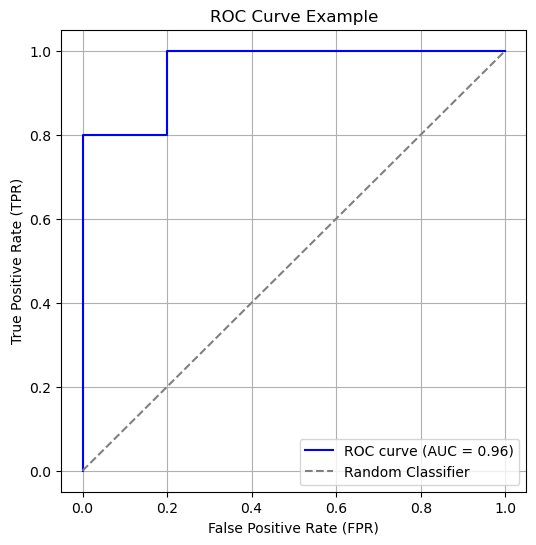

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Example data: true labels and predicted probabilities
# (You can change these to see different ROC shapes)
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.7, 0.3, 0.9, 0.6, 0.05])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.2f}")
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Classifier")

# Labels and title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Example")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Bias-Variance Tradeoff

The **Bias-Variance Tradeoff** is a key concept in machine learning that explains the 
balance between **underfitting** and **overfitting**.

---

#### Bias
- Bias measures how far the **predictions** are from the **true values** (systematic error).
- **High Bias** → Model is too simple → Underfitting.

---

#### Variance
- Variance measures how much the model’s predictions change if trained on different datasets.
- **High Variance** → Model is too complex → Overfitting.

---

#### Tradeoff
- We want a model that **balances bias and variance**.
- Too simple → high bias, low variance (underfits).
- Too complex → low bias, high variance (overfits).
- The **goal** is to find the sweet spot with **low total error**.

$$
\text{Expected Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$


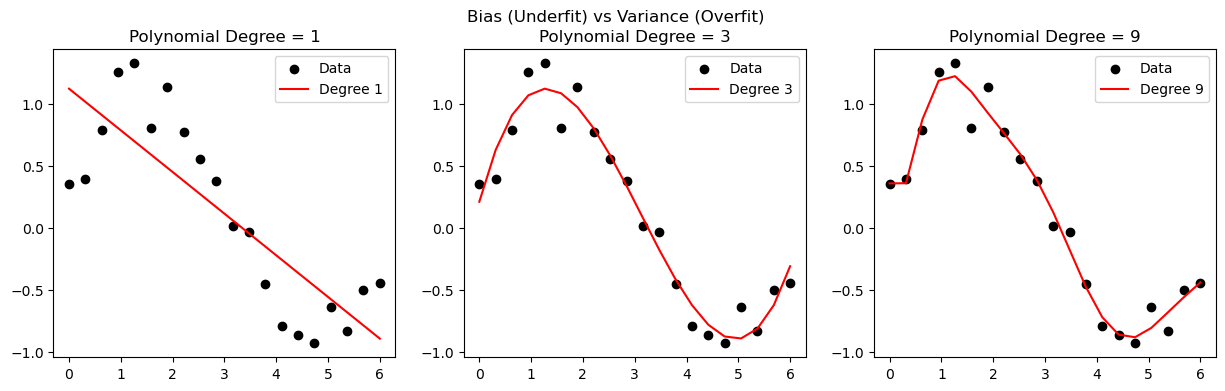

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create sample data
np.random.seed(0)
X = np.linspace(0, 6, 20).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, 20)

# Try 3 models with different complexities
degrees = [1, 3, 9]

plt.figure(figsize=(15, 4))
for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color="black", label="Data")
    plt.plot(X, y_pred, color="red", label=f"Degree {d}")
    plt.title(f"Polynomial Degree = {d}")
    plt.legend()

plt.suptitle("Bias (Underfit) vs Variance (Overfit)")
plt.show()
